# 一元线性回归实现

## 最小二乘法实现
使用平方损失函数计算loss，并使用最小二乘法来求解a,b，即求导数并令其等于0，求出a,b

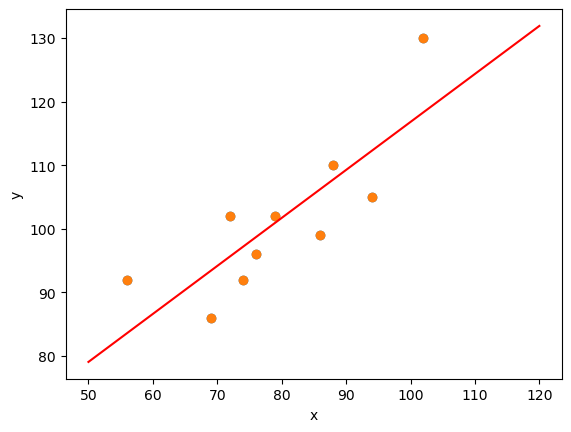

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

def square_loss(x: np.ndarray, y: np.ndarray, a: float, b: float) -> float:
    loss = sum(np.square(y - (a * x + b)))
    return loss

def least_squares_algebraic(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    a = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    b = np.mean(y) - a * np.mean(x)
    return a, b

a, b = least_squares_algebraic(x, y)
square_loss(x, y, a, b)

x_temp = np.linspace(50, 120, 100)
plt.scatter(x, y)
plt.plot(x_temp, a * x_temp + b, color='red')

plt.show()

## 最小二乘法的矩阵形式
可以看到，使用矩阵形式计算较快

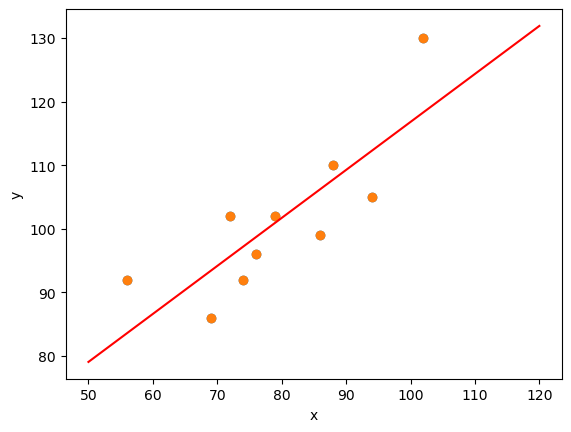

In [2]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

x_matrix = np.matrix(np.hstack((np.ones((x.shape[0], 1)), x.reshape(x.shape[0], 1))))
y_matrix = np.matrix(y.reshape(y.shape[0], 1))
x_matrix, y_matrix

# def square_loss(x: np.ndarray, y: np.ndarray, a: float, b: float) -> float:
#     loss = sum(np.square(y - (a * x + b)))
#     return loss 最小二乘法的损失函数

def least_squares_matrix(x: np.matrix, y: np.matrix):
    """最小二乘法矩阵求解"""
    w = (x.T * x).I * x.T * y
    return w

def least_squares_algebraic(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    a = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    b = np.mean(y) - a * np.mean(x)
    return a, b

a, b = least_squares_algebraic(x, y)
square_loss(x, y, a, b)

x_temp = np.linspace(50, 120, 100)
plt.scatter(x, y)
plt.plot(x_temp, a * x_temp + b, color='red')

plt.show()

## scikit-learn 实现
用到LinerarRegression类
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
其中的参数含义：
fit_intercept：是否计算截距
normalize：是否对数据进行标准化，默认为false
copy_X：是否复制数据，默认为True，使用数据的副本
n_jobs：并行数，-1表示使用全部CPU核

In [2]:
from sklearn.linear_model import LinearRegression

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(x.shape[0], 1), y)  # 训练，reshape 操作把数据处理成 fit 能接受的形状

# 得到模型拟合参数
model.intercept_, model.coef_

model.predict(np.array([[150]]))


array([154.52273298])

## 综合案例
### 数据集介绍及划分
用波士顿房价数据集，这是一份关于波士顿地区房价的数据集，共506条记录，13个特征，1个目标变量。
先看一下数据集

In [ ]:
import pandas as pd

# 从本地文件读取
file_path = "course-5-boston.csv" 
df = pd.read_csv(file_path)

# 查看数据的前几行
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


我们只使用CRIM, RM, LSTAT 三个特征用于线性回归模型训练
其中CRIM是犯罪率，RM是平均房间数，LSTAT是低收入人群比例，medv是城镇住房的中位数
并且使用 describe() 方法查看其描述信息。 describe() 统计了每列数据的个数、最大值、最小值、平均数等信息。

In [8]:
features = df[["crim", "rm", "lstat"]]
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647423,6.623500,16.955000
max,88.976200,8.780000,37.970000


同样，我们将目标值单独拿出来。训练一个机器学习预测模型时，我们通常会将数据集划分为 70% 和 30% 两部分。

其中，70% 的部分被称之为训练集，用于模型训练。例如，这里的线性回归，就是从训练集中找到最佳拟合参数Ω的值。另外的 30% 被称为测试集。对于测试集而言，首先我们知道它对应的真实目标值，然后可以给学习完成的模型输入测试集中的特征，得到预测目标值。最后，通过对比预测的目标值与真实目标值之间的差异，评估模型的预测性能。

接下来，我们针对数据集的特征和目标进行分割，分别得到 70% 的训练集和 30% 的测试集。其中，训练集特征、训练集目标、测试集特征和测试集目标分别定义为：X_train, y_train, X_test, y_test。

In [9]:
target = df["medv"]  # 目标值数据

split_num = int(len(features) * 0.7)  # 得到 70% 位置

X_train = features[:split_num]  # 训练集特征
y_train = target[:split_num]  # 训练集目标

X_test = features[split_num:]  # 测试集特征
y_test = target[split_num:]  # 测试集目标

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 3), (354,), (152, 3), (152,))

## 构建和训练模型


In [10]:
model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
model.coef_, model.intercept_  # 输出训练后的模型参数和截距项

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.000969889690325)

三个参数分别对应数据集中 CRIM, RM 和 LSTAT 列。接下来，向训练好的模型中输入测试集的特征得到预测值。

In [11]:
preds = model.predict(X_test)  # 输入测试集特征进行预测
preds  # 预测结果

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

对于回归预测结果，通常会有平均绝对误差、平均绝对百分比误差、均方误差等多个指标进行评价。
对于平均绝对误差，我们可以通过以下公式进行计算：

MAE = (1/n) * ∑|yi - yi_hat|

其中，n为样本个数，yi为真实值，yi_hat为预测值。

对于均方误差，我们可以通过以下公式进行计算：

MSE = (1/n) * ∑(yi - yi_hat)^2

其中，n为样本个数，yi为真实值，yi_hat为预测值。


In [12]:
def mae_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MAE 求解"""
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred)) / n
    return mae
def mse_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MSE 求解"""
    n = len(y_true)
    mse = sum((y_true - y_pred) ** 2) / n
    return mse

mae = mae_solver(y_test.values, preds)
mse = mse_solver(y_test.values, preds)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

MAE: 13.0221
MSE: 303.8331


或者使用scikit-learn实现

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_ = mean_absolute_error(y_test, preds)
mse_ = mean_squared_error(y_test, preds)

print("scikit-learn MAE: ", mae_)
print("scikit-learn MSE: ", mse_)

scikit-learn MAE:  13.022063072780306
scikit-learn MSE:  303.83312472236486


可以看到，这里模型预测结果的平均绝对误差约为 13.02。如果计算一下全部目标值的平均值 (结果为 22 左右)，会发现 13.02 的平均绝对误差应该说是很大了。这也就说明模型的表现并不好，这是什么原因呢？

究其原因主要是 2 个方面。首先是数据，我们没有针对数据进行预处理，且随机选择了 3 个特征，并没有合理利用数据集提供的其他特征。此外，也没有针对异常数据进行剔除以及规范化。另一个原因其实是算法本身，线性回归是通过线性关系去反映出数据的规律，但实际上房价并非简单的线性关系能够表征的，所以也是最终预测效果不好的原因之一。